In [1]:
import struct
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
from sklearn import decomposition
from sklearn.svm import LinearSVC

In [2]:
import struct
with open('../dataset/MNIST/train-labels-idx1-ubyte', 'rb') as lbpath:
    magic, n = struct.unpack('>II', lbpath.read(8))
    y_train = np.fromfile(lbpath, dtype=np.uint8)
with open('../dataset/MNIST/train-images-idx3-ubyte', 'rb') as imgpath:
    magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
    X_train = np.fromfile(imgpath,dtype=np.uint8).reshape(len(y_train), -1)
with open('../dataset/MNIST/t10k-labels-idx1-ubyte', 'rb') as lbpath:
    magic, n = struct.unpack('>II', lbpath.read(8))
    y_test = np.fromfile(lbpath, dtype=np.uint8)
with open('../dataset/MNIST/t10k-images-idx3-ubyte', 'rb') as imgpath:
    magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
    X_test = np.fromfile(imgpath,dtype=np.uint8).reshape(len(y_test), -1)

In [32]:
# Scale and visualize the embedding vectors
def plot_embedding(X_emb, y):
    x_min, x_max = np.min(X_emb, 0), np.max(X_emb, 0)
    X_emb = (X_emb - x_min) / (x_max - x_min)

    plt.figure(figsize=(12, 10), dpi=200)
    ax = plt.subplot(111)
    for i in range(X_emb.shape[0]):
        plt.text(X_emb[i, 0], X_emb[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([]), plt.yticks([])

In [29]:
sub_sample = 5000
y_origin = y_train[:sub_sample]
X_origin = X_train[:sub_sample]

n_samples, n_features = X.shape

In [ ]:
# t-SNE embedding of the digits dataset
X_pca = decomposition.TruncatedSVD(n_components=50).fit_transform(X_origin)
tsne  = manifold.TSNE()
X_tsne = tsne.fit_transform(X_pca)

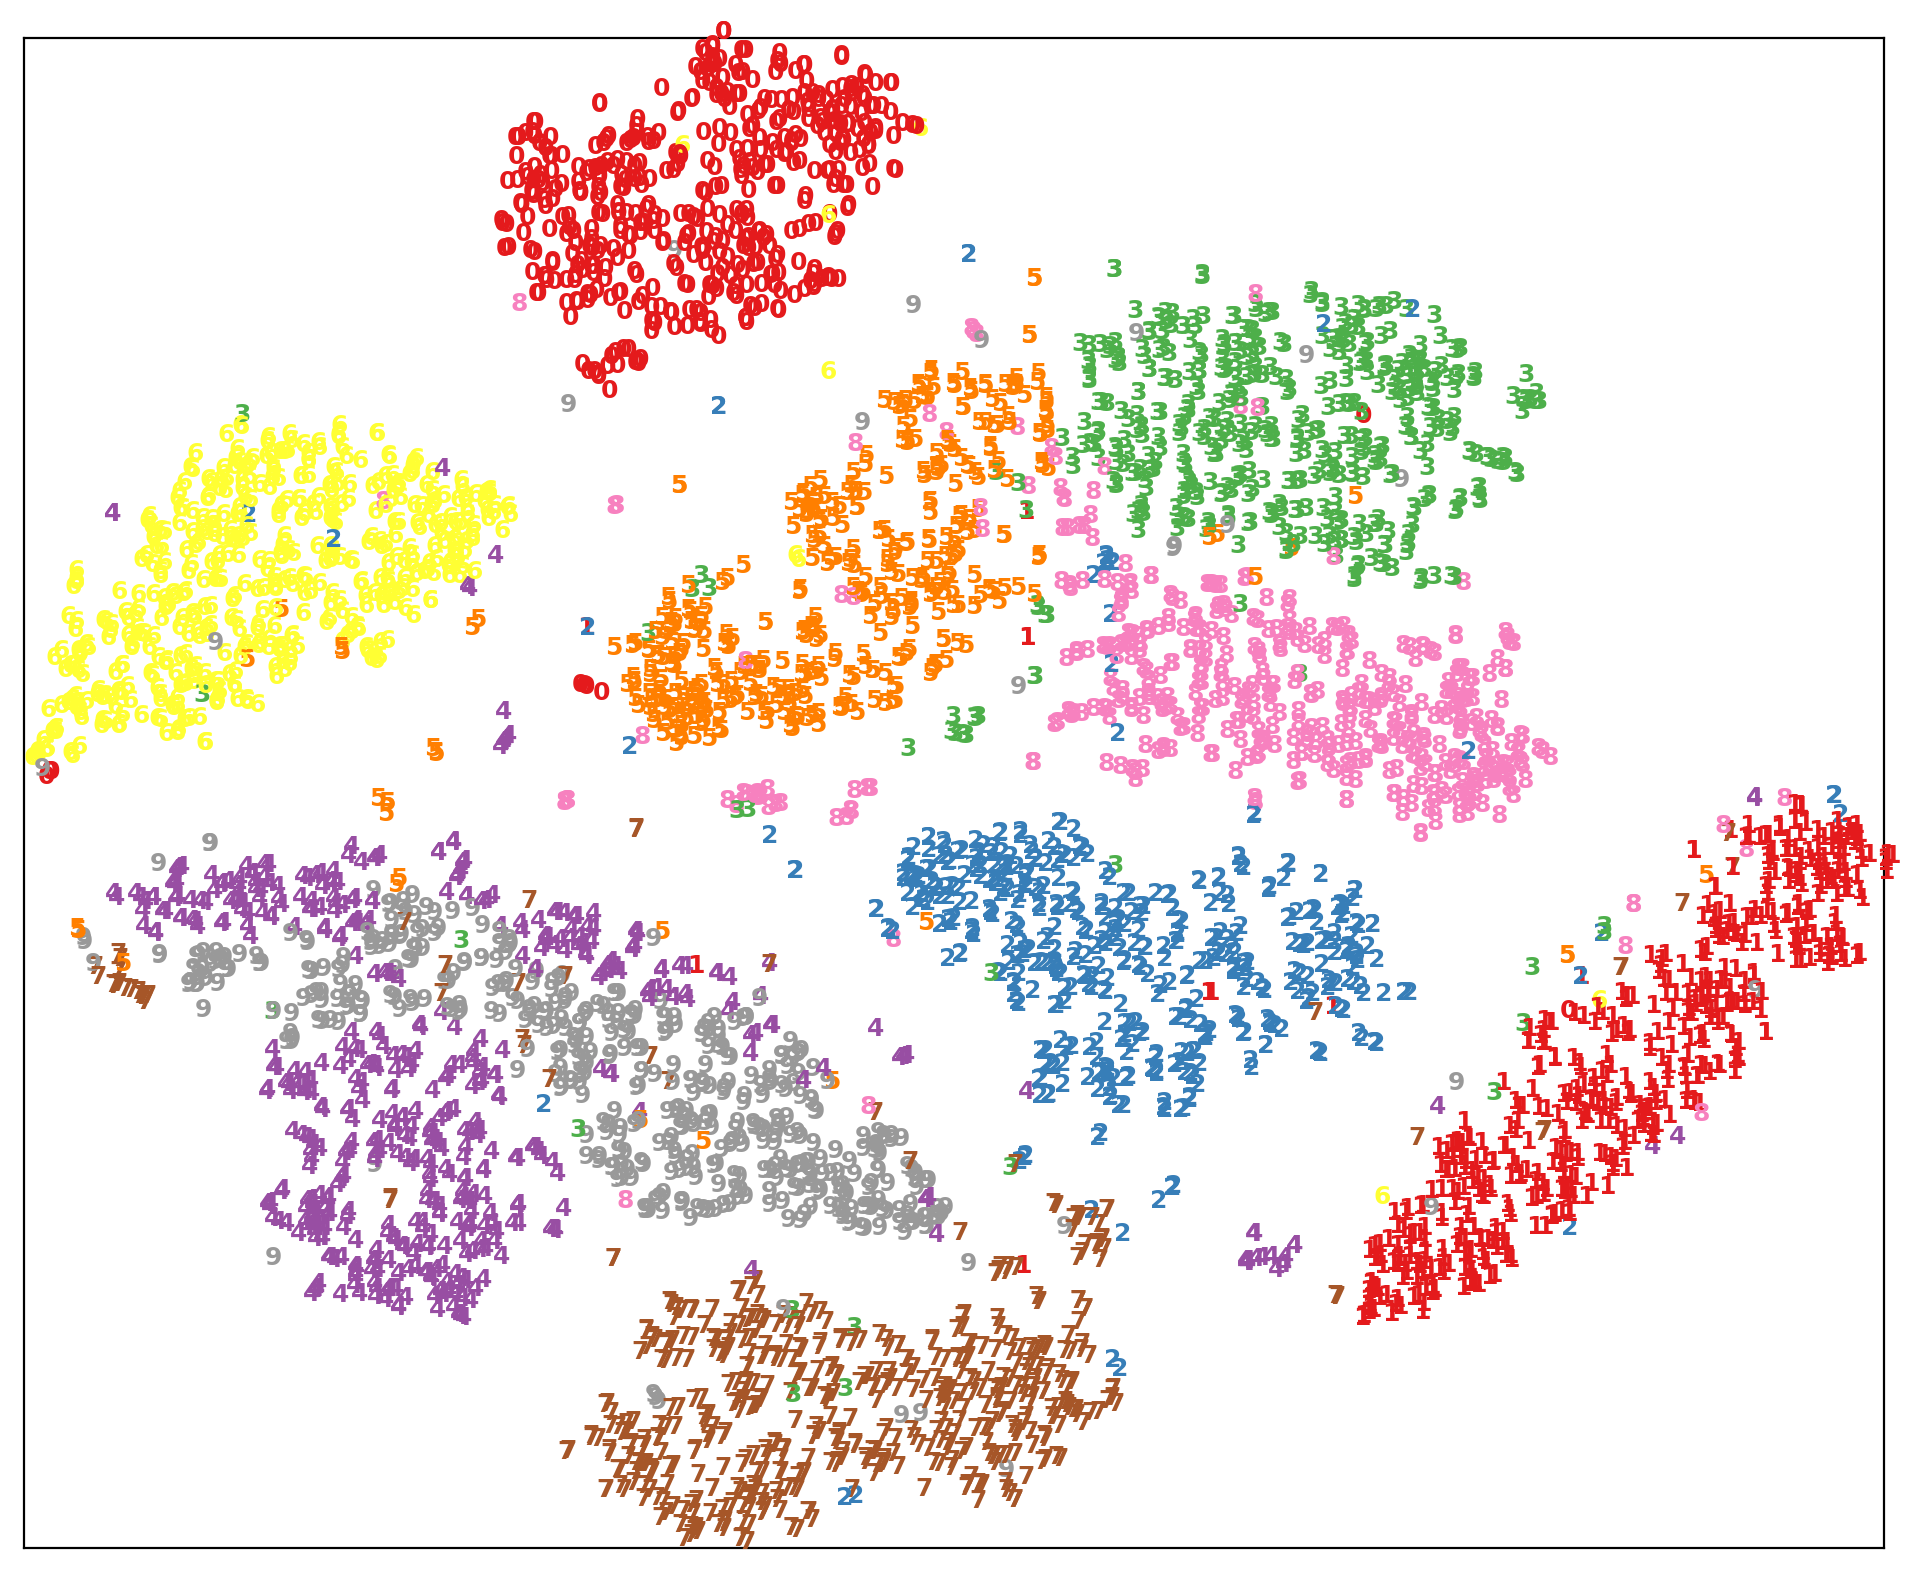

In [35]:
plot_embedding(X_tsne, y_origin)
plt.savefig('origin.png', bbox_inches='tight')

In [30]:
# fig=plt.figure(figsize=(8, 8), dpi=200)
# fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
# for i in range(30):
#     img = X_train[i].reshape(28, 28)
#     ax=fig.add_subplot(6,5,i+1,xticks=[],yticks=[])
#     ax.imshow(img,cmap=plt.cm.binary_r,interpolation='nearest')
#     ax.text(0,7,str(y_train[i]))
# fig.savefig("samples.png", bbox_inches='tight')

In [10]:
# # use SVM to classify
# svm = LinearSVC()
# svm = svm.fit(X_train, y_train)
# svm.score(X_test, y_test)

In [16]:
# load intermediate layers
with open('test.npy', 'rb') as fout:
    test = np.load(fout)
test = np.concatenate(test)

In [ ]:
X_pca = decomposition.TruncatedSVD(n_components=50).fit_transform(test[:n_samples])
tsne2  = manifold.TSNE()
test_tsne2 = tsne2.fit_transform(X_pca)

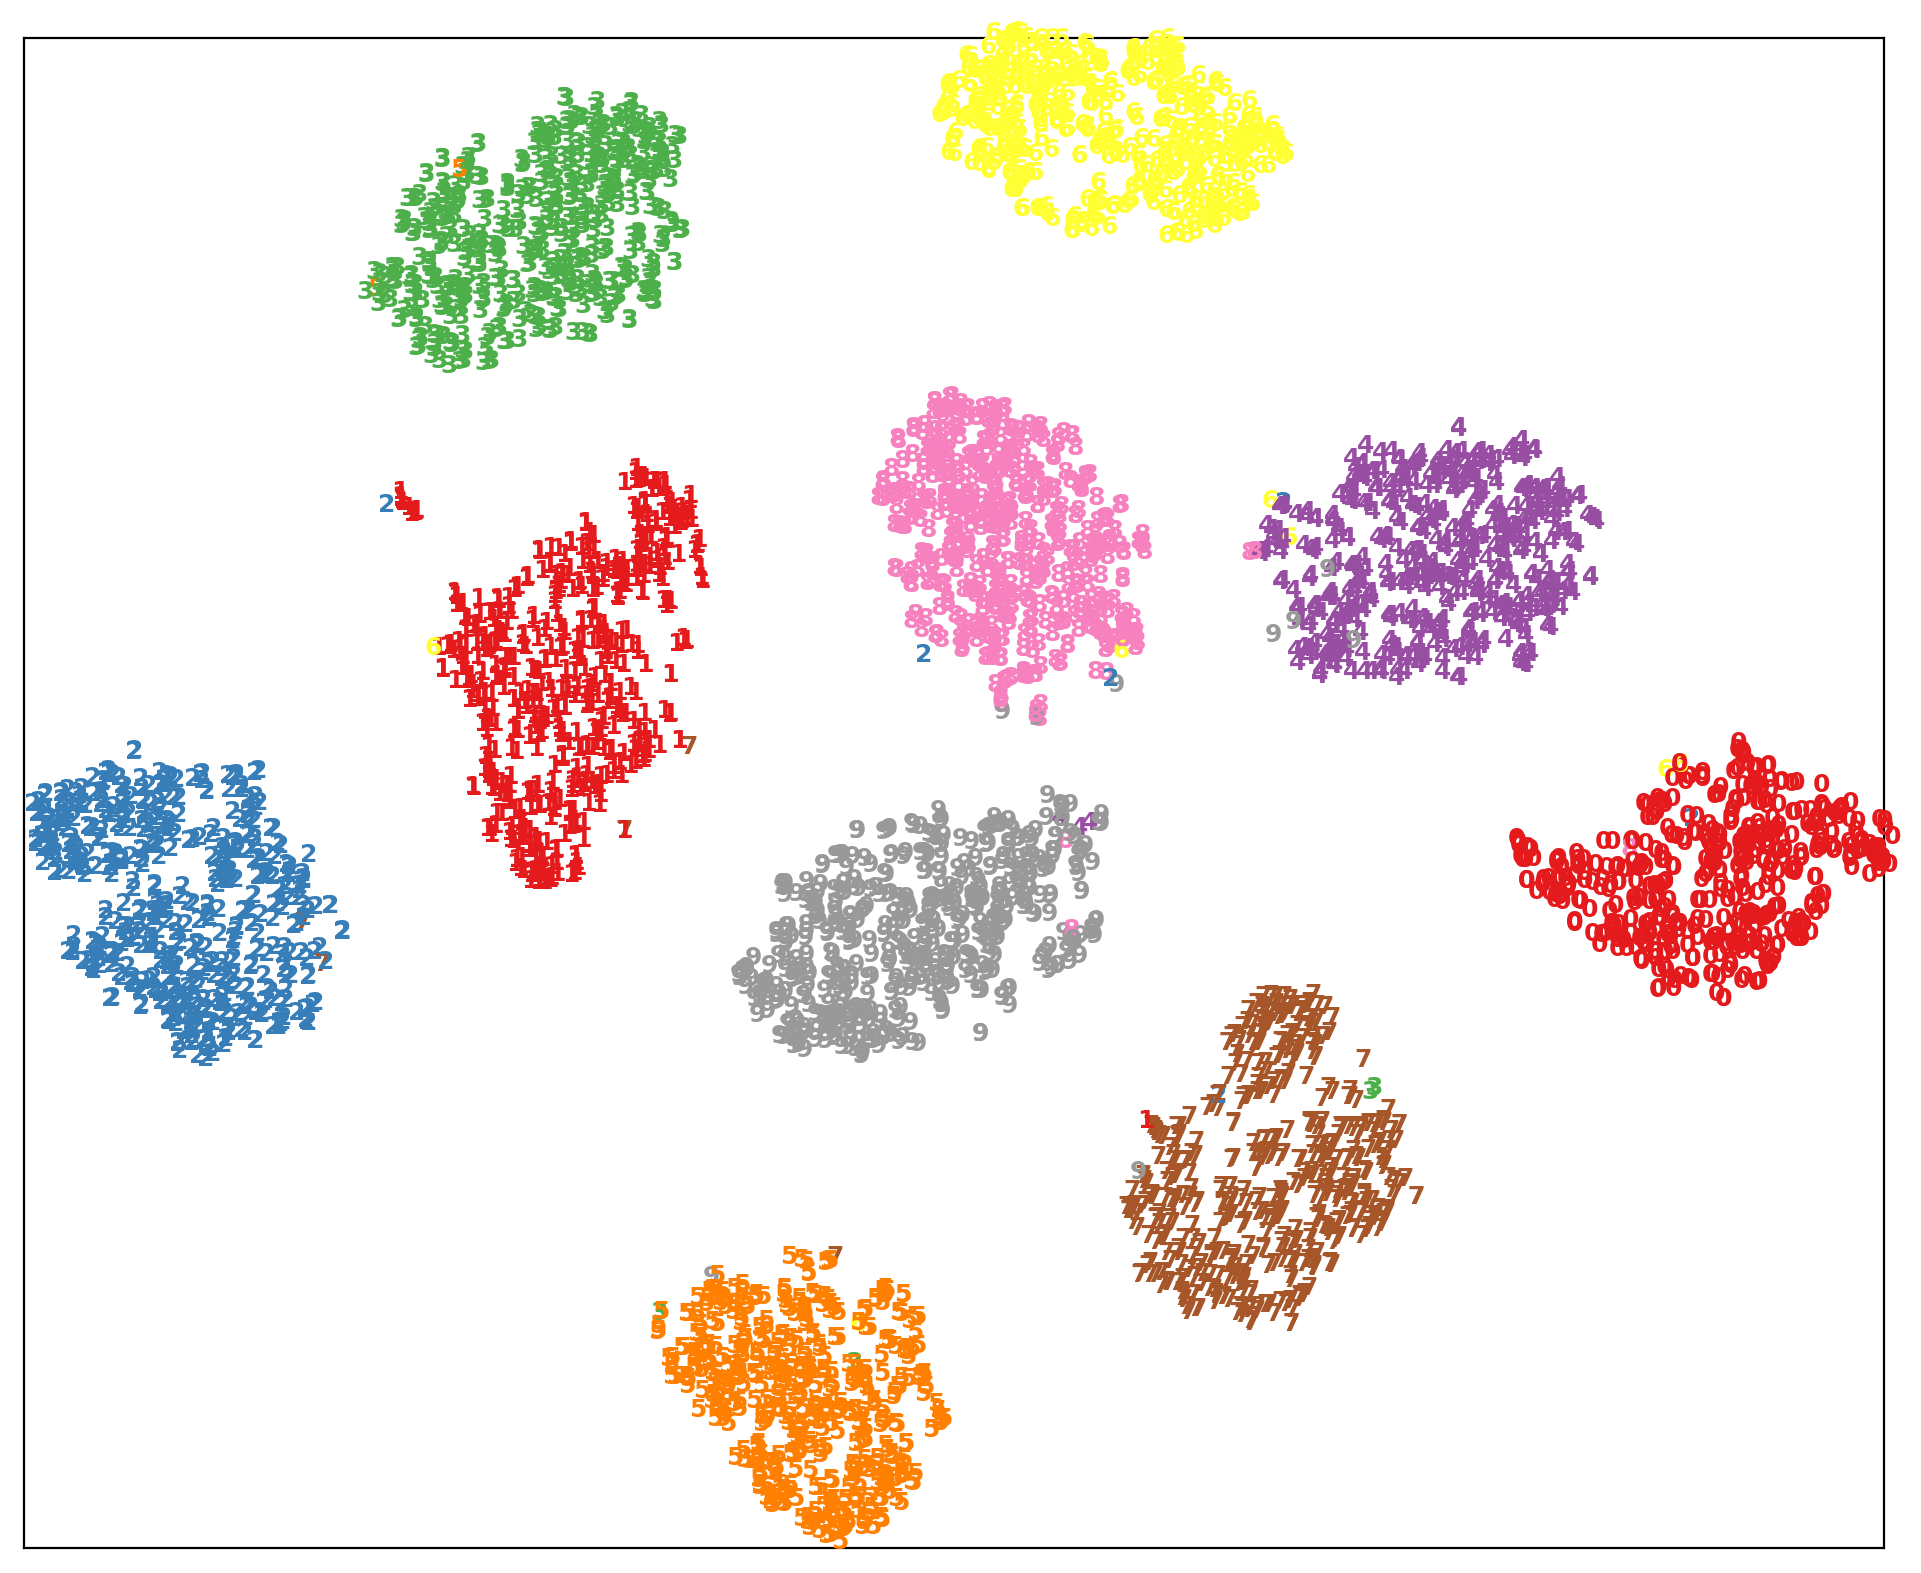

In [34]:
plot_embedding(test_tsne2, y_test[:n_samples])
plt.savefig('inter.png', bbox_inches='tight')